<a href="https://colab.research.google.com/github/Alepescinaa/ScientificTools/blob/main/Lab_Ricky/Lab2/NeuralNetwork_ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercises: neural network overfitting

Exercise on classification using NN.

Date: 2024

Course: 056936 - SCIENTIFIC COMPUTING TOOLS FOR ADVANCED MATHEMATICAL MODELLING (PAGANI STEFANO) [2023-24].


Exercise on overfitting.
Example adapted from:
[3] Tensorflow tutotials
Data from:
[1] Brunton, S. L., & Kutz, J. N. (2022).
Data-driven science and engineering: Machine learning,
dynamical systems, and control. Cambridge University Press.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import io
import os
from sklearn import linear_model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import regularizers

In [2]:
!git clone https://github.com/Alepescinaa/ScientificTools
%cd ScientificTools/Lab_Ricky/Lab2

fatal: destination path 'ScientificTools' already exists and is not an empty directory.
/content/ScientificTools/Lab_Ricky/Lab2


In [3]:
dogdata_mat = io.loadmat('dogData.mat')
catdata_mat = io.loadmat('catData.mat')

dog = dogdata_mat['dog']
cat = catdata_mat['cat']

#CD = np.concatenate((dog,cat),axis=1)

FEATURES = 50

np.random.seed(1)
tf.random.set_seed(1)

ind_selected = np.floor( 1/(64*64) + ((64*64)-1)*np.random.rand(FEATURES) ).astype(int)

X_train = np.concatenate((dog[ind_selected,:60],cat[ind_selected,:60]),axis=1)
X_test = np.concatenate((dog[ind_selected,60:80],cat[ind_selected,60:80]),axis=1)
y_train = np.repeat(np.array([1,-1]),60)
y_test = np.repeat(np.array([1,-1]),20)

y = np.array([[1,0],[0,1]])

X_tf_train = tf.constant( np.transpose(X_train)/256, dtype = tf.float32 )
X_tf_test = tf.constant( np.transpose(X_test)/256, dtype = tf.float32 )
y_tf_train = tf.constant( np.repeat(y, [60, 60], axis=0) , dtype = tf.float32 )
y_tf_test = tf.constant( np.repeat(y, [20, 20], axis=0) , dtype = tf.float32 )

In [4]:
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
  0.001,
  decay_steps=100,
  decay_rate=1,
  staircase=False)

def get_optimizer():
    return tf.keras.optimizers.Adam(lr_schedule)

def get_callbacks(name):
    return [
        tf.keras.callbacks.EarlyStopping(monitor='val_binary_crossentropy', patience=200, min_delta=0.001),
        ]

def compile_and_fit(model, name, optimizer=None, max_epochs=10000):

    if optimizer is None:
        optimizer = get_optimizer()

    model.compile(optimizer=optimizer,
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=[
                  tf.keras.losses.BinaryCrossentropy(
                      from_logits=True, name='binary_crossentropy'),
                  'accuracy'])

    model.summary()

    history = model.fit(
            X_tf_train, y_tf_train,
            #steps_per_epoch = STEPS_PER_EPOCH,
            epochs=1000,
            validation_data=(X_tf_test, y_tf_test),
            callbacks=get_callbacks(name),
            verbose=2)

    return history

Complete the notebook to train and test the following architectures:

1. a tiny FFNNs made by
  - hidden layer of 8 neurons with `elu` activation function,
  - output layer of 1 neurons with `softmax` activation function;

2. a medium FFNNs made by
  - hidden layer of 8 neurons with `elu` activation function,
  - hidden layer of 8 neurons with `elu` activation function,
  - output layer of 1 neurons with `softmax` activation function;

3. a large FFNNs made by
  - hidden layer of 32 neurons with `elu` activation function,
  - hidden layer of 32 neurons with `elu` activation function,
  - hidden layer of 32 neurons with `elu` activation function,
  - output layer of 1 neurons with `softmax` activation function;

4. a large FFNNs with $\ell_2$ regularization of the weights (find a sub-optimal regularization coefficient);

5. a large FFNNs with dropout regularization of the weights;

6. a large FFNNs with both $\ell_2$ and dropout regularization of the weights;

Compare on an image the trends of the binary cross-entropy (evaluated on the training and test sets) of these different architectures.

In [7]:
tiny_model = tf.keras.Sequential([
    layers.Dense(8, activation="elu", input_shape = (FEATURES, )),
    layers.Dense(2, activation="softmax")
])

medium_model = tf.keras.Sequential([
    layers.Dense(8, activation="elu", input_shape = (FEATURES, )),
    layers.Dense(8, activation="elu"),
    layers.Dense(2, activation="softmax")
])

large_model = tf.keras.Sequential([
    layers.Dense(32, activation="elu", input_shape = (FEATURES, )),
    layers.Dense(32, activation="elu"),
    layers.Dense(32, activation="elu"),
    layers.Dense(2, activation="softmax")
])

In [8]:
size_histories = {}
size_histories['Large'] = compile_and_fit(large_model, 'sizes/Large')
size_histories['Tiny'] = compile_and_fit(tiny_model, 'sizes/Tiny')
size_histories['Medium'] = compile_and_fit(medium_model, 'sizes/Medium')

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 32)                1632      
                                                                 
 dense_18 (Dense)            (None, 32)                1056      
                                                                 
 dense_19 (Dense)            (None, 32)                1056      
                                                                 
 dense_20 (Dense)            (None, 2)                 66        
                                                                 
Total params: 3810 (14.88 KB)
Trainable params: 3810 (14.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/1000


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5818: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


4/4 - 2s - loss: 0.6618 - binary_crossentropy: 0.6599 - accuracy: 0.6250 - val_loss: 0.6702 - val_binary_crossentropy: 0.6449 - val_accuracy: 0.5500 - 2s/epoch - 439ms/step
Epoch 2/1000
4/4 - 0s - loss: 0.6359 - binary_crossentropy: 0.6346 - accuracy: 0.6833 - val_loss: 0.6641 - val_binary_crossentropy: 0.6410 - val_accuracy: 0.6000 - 57ms/epoch - 14ms/step
Epoch 3/1000
4/4 - 0s - loss: 0.6149 - binary_crossentropy: 0.6130 - accuracy: 0.7417 - val_loss: 0.6586 - val_binary_crossentropy: 0.6498 - val_accuracy: 0.6250 - 57ms/epoch - 14ms/step
Epoch 4/1000
4/4 - 0s - loss: 0.6008 - binary_crossentropy: 0.6017 - accuracy: 0.7667 - val_loss: 0.6553 - val_binary_crossentropy: 0.6577 - val_accuracy: 0.6250 - 61ms/epoch - 15ms/step
Epoch 5/1000
4/4 - 0s - loss: 0.5818 - binary_crossentropy: 0.5805 - accuracy: 0.7917 - val_loss: 0.6502 - val_binary_crossentropy: 0.6403 - val_accuracy: 0.6750 - 40ms/epoch - 10ms/step
Epoch 6/1000
4/4 - 0s - loss: 0.5637 - binary_crossentropy: 0.5625 - accuracy: 

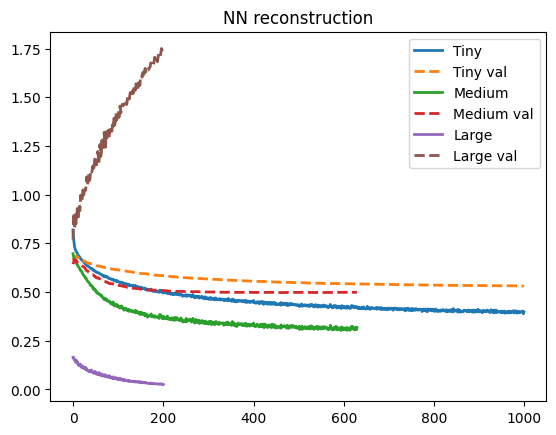

In [14]:
#plt.figure()

for NNdim in ['Tiny','Medium','Large']:

    history = size_histories[NNdim]

    bc     = history.history['binary_crossentropy']
    val_bc = history.history['val_binary_crossentropy']

    plt.plot(range(np.shape(bc)[0]),bc, linewidth=2,)
    plt.plot(range(np.shape(val_bc)[0]),val_bc,'--', linewidth=2,)
    plt.title('NN reconstruction')
    #plt.show(block=False)

plt.legend(('Tiny','Tiny val','Medium','Medium val','Large','Large val'))
plt.show()

In [15]:
regularization_coefficient = 0
large_reg_model = tf.keras.Sequential([
    layers.Dense(32, activation="elu", kernel_regularizer = tf.keras.regularizers.l2(regularization_coefficient),input_shape = (FEATURES, )),
    layers.Dense(32, activation="elu", kernel_regularizer = tf.keras.regularizers.l2(regularization_coefficient)),
    layers.Dense(32, activation="elu", kernel_regularizer = tf.keras.regularizers.l2(regularization_coefficient)),
    layers.Dense(2, activation="softmax")
])

dropout_rate = 0.2
large_drop_model = tf.keras.Sequential([
    layers.Dense(32, activation="elu", input_shape = (FEATURES, )),
    layers.Dropout(dropout_rate),
    layers.Dense(32, activation="elu"),
    layers.Dropout(dropout_rate),
    layers.Dense(32, activation="elu"),
    layers.Dropout(dropout_rate),
    layers.Dense(2, activation="softmax")
])

large_reg_drop_model = tf.keras.Sequential([
    layers.Dense(32, activation="elu", kernel_regularizer = tf.keras.regularizers.l2(regularization_coefficient), input_shape = (FEATURES, )),
    layers.Dropout(dropout_rate),
    layers.Dense(32, activation="elu", kernel_regularizer = tf.keras.regularizers.l2(regularization_coefficient)),
    layers.Dropout(dropout_rate),
    layers.Dense(32, activation="elu", kernel_regularizer = tf.keras.regularizers.l2(regularization_coefficient)),
    layers.Dropout(dropout_rate),
    layers.Dense(2, activation="softmax")
])

In [16]:
size_histories['Large_reg'] = compile_and_fit(large_reg_model, 'sizes/Large_reg')
size_histories['Large_drop'] = compile_and_fit(large_drop_model, 'sizes/Large_drop')
size_histories['Large_reg_drop'] = compile_and_fit(large_reg_drop_model, 'sizes/Large_reg_drop')

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 32)                1632      
                                                                 
 dense_34 (Dense)            (None, 32)                1056      
                                                                 
 dense_35 (Dense)            (None, 32)                1056      
                                                                 
 dense_36 (Dense)            (None, 2)                 66        
                                                                 
Total params: 3810 (14.88 KB)
Trainable params: 3810 (14.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/1000
4/4 - 2s - loss: 0.7219 - binary_crossentropy: 0.7200 - accuracy: 0.3917 - val_loss: 0.6801 - val_binary_crossentropy: 0.6815 - val_accurac

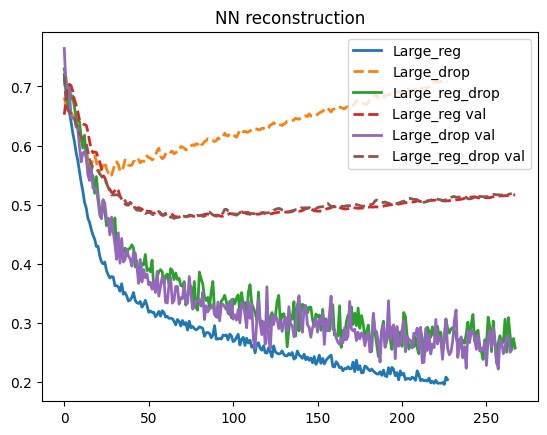

In [17]:
#plt.figure()

for NNdim in ['Large_reg','Large_drop','Large_reg_drop' ]:

    history = size_histories[NNdim]

    bc     = history.history['binary_crossentropy']
    val_bc = history.history['val_binary_crossentropy']

    plt.plot(range(np.shape(bc)[0]),bc, linewidth=2,)
    plt.plot(range(np.shape(val_bc)[0]),val_bc,'--', linewidth=2,)
    plt.title('NN reconstruction')
    #plt.show(block=False)

plt.legend(('Large_reg','Large_drop','Large_reg_drop','Large_reg val','Large_drop val','Large_reg_drop val'))
plt.show()